# CS672 Deep Learning Project #2

Aayushi Verma

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import torch
from torch import nn
import torch.optim as optim
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from itertools import product

## Dataset

We are using the Breast Cancer dataset (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) donated to UCI Machine Learning Repository. We will explore the characteristics of the dataset through exploratory data analysis and will create a deep learning model to train the dataset.

In [51]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We will load the feature data into a Pandas Dataframe called X, and the target data into a Pandas DataFrame called y.

In [52]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
y = pd.DataFrame(data['target'], columns=['tumor_type'])
y.head()

,tumor_type
0,0
1,0
2,0
3,0
4,0


In [54]:
df = pd.concat([X,y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [55]:
# checking data shape
print(df.shape, X.shape, y.shape)

(569, 31) (569, 30) (569, 1)


In [56]:
# looking at basic statistics of data within dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor_type
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [57]:
# getting info about df columns at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Exploratory Data Analysis

Prep the data in order to be ready to be fed to a model.
Look for missing, null, NaN records.
Find outliers.
Transform data – all entries should be numeric.

In [58]:
# double-checking for nulls
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
tumor_type                 0
dtype: int64

In [59]:
# finding columns in the df which have any null/na values
np.where(pd.isna(df))

(array([], dtype=int64), array([], dtype=int64))

So we have just triple-checked that there are no nulls, NA, or missing values in the dataframe - it is a very clean dataset - fantastic! Let's now look at the correlation between features.

In [60]:
# obtaining correlation matrix
corr = df.corr()
corr.style.background_gradient('coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor_type
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [61]:
# sorting by highest correlations to our target variable, Class
corr['tumor_type'].sort_values(ascending=False)

tumor_type                 1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

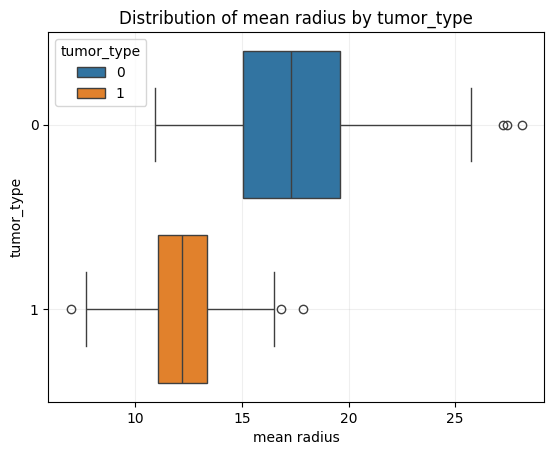

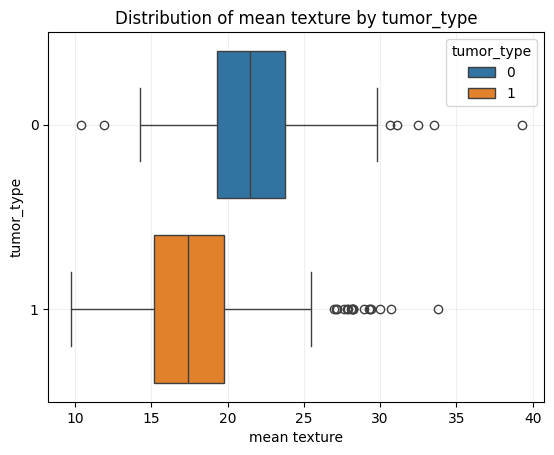

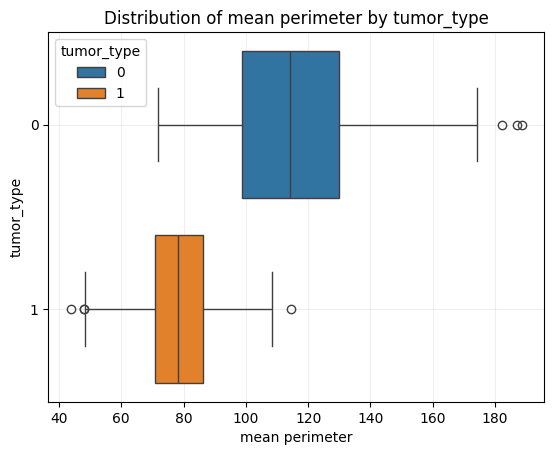

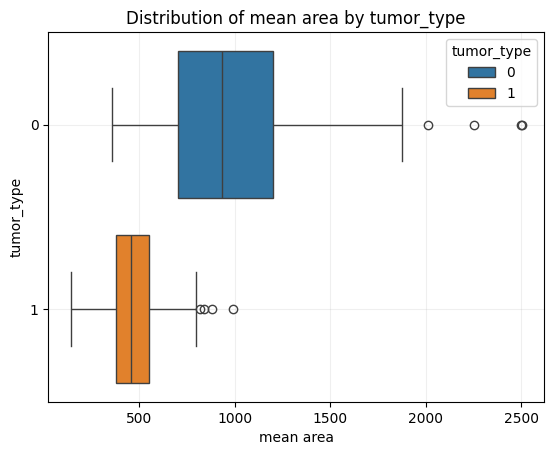

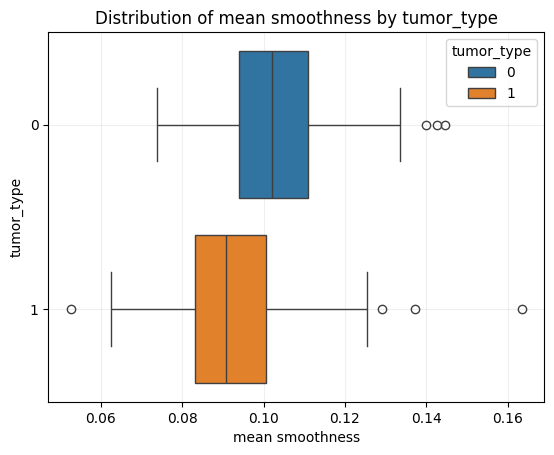

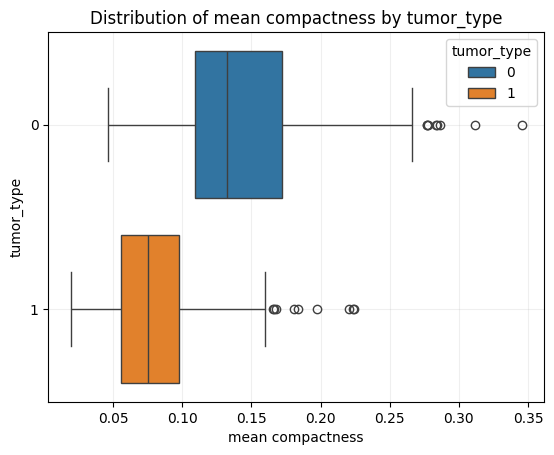

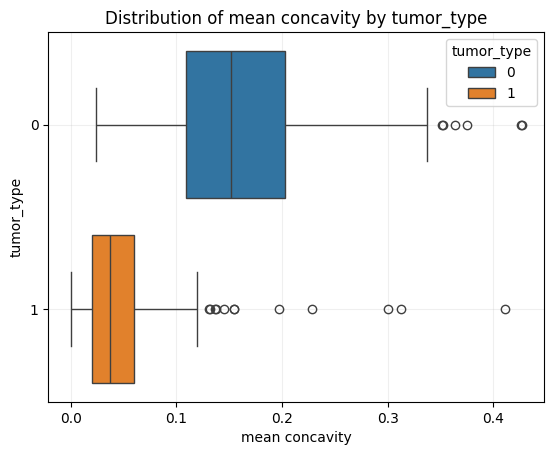

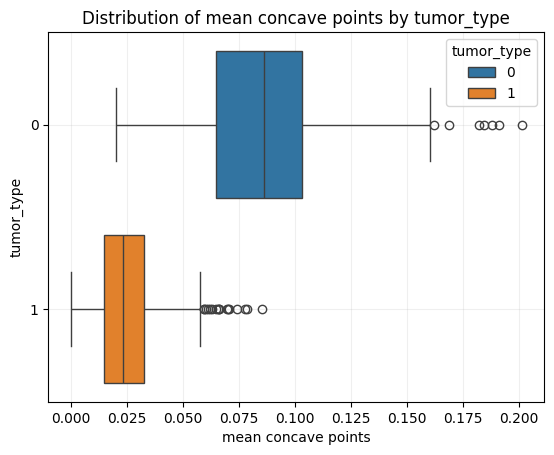

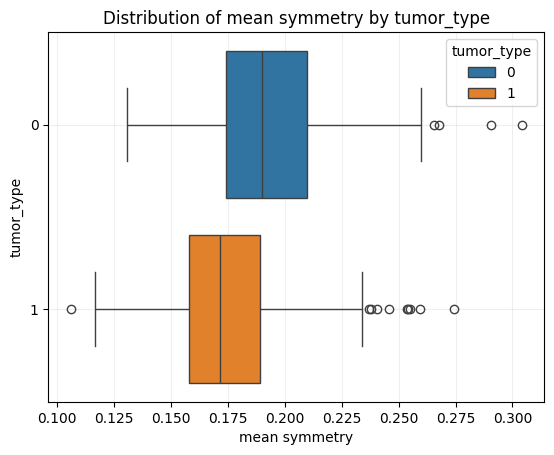

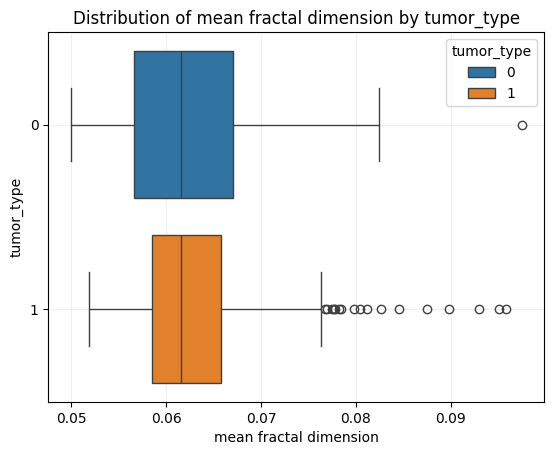

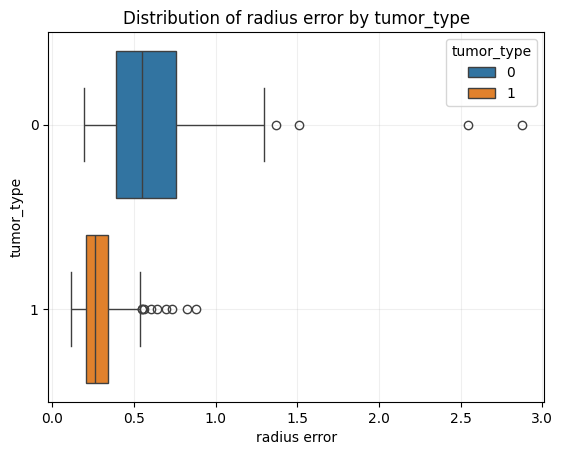

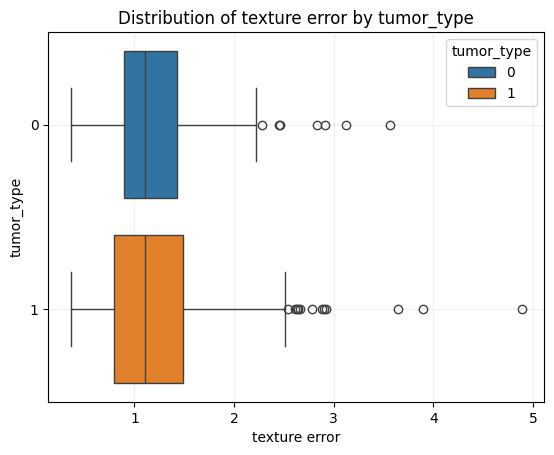

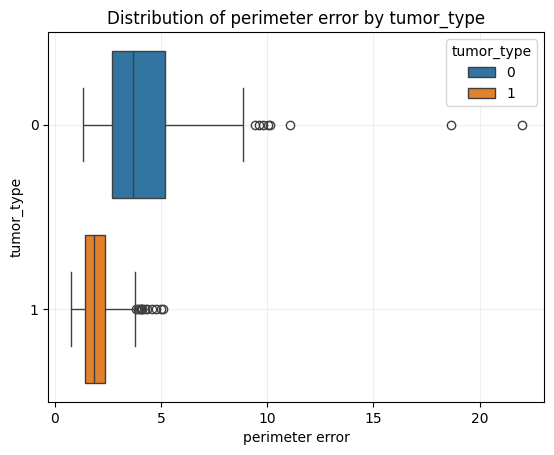

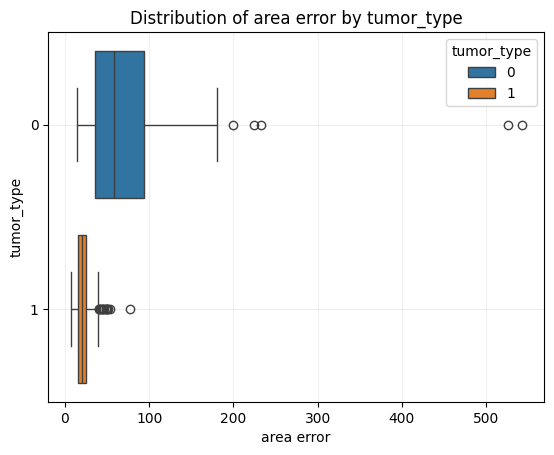

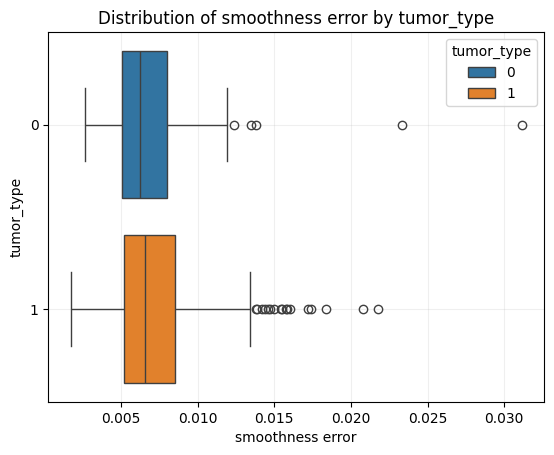

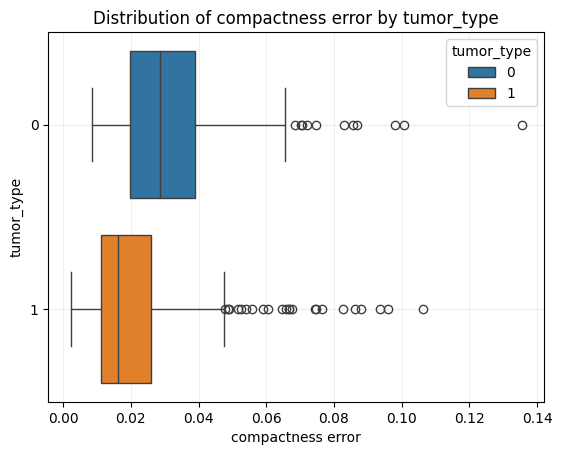

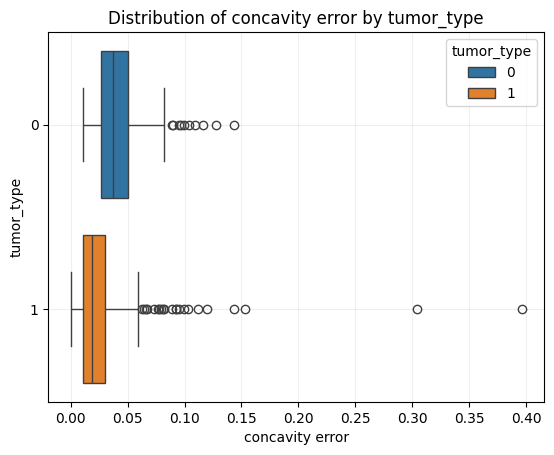

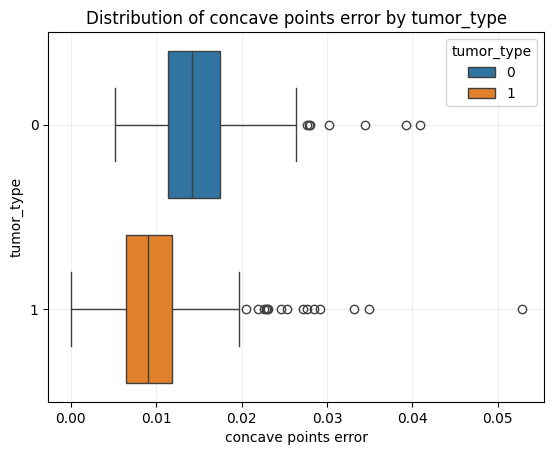

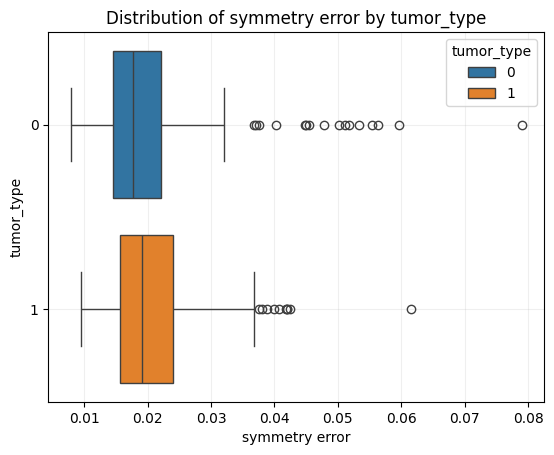

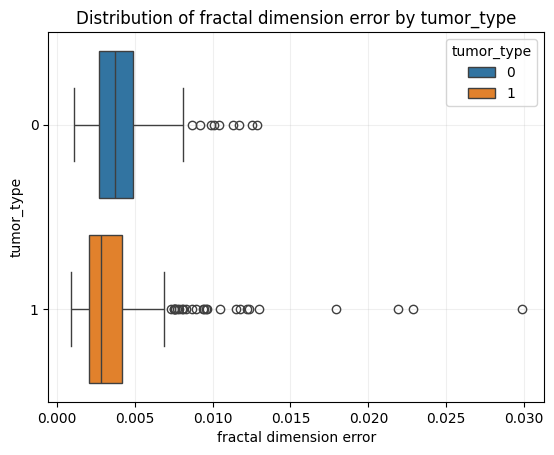

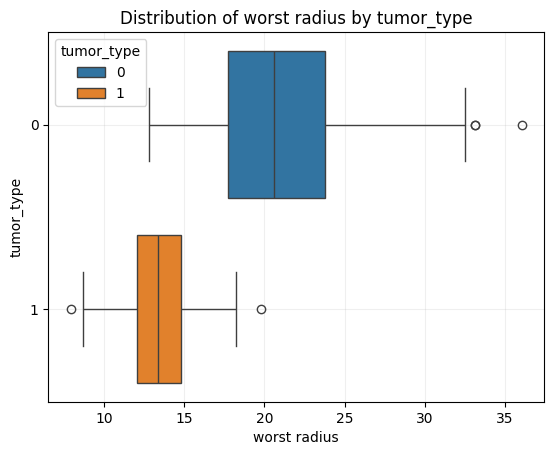

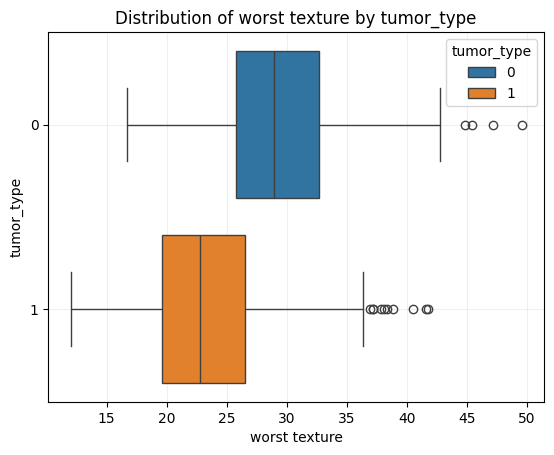

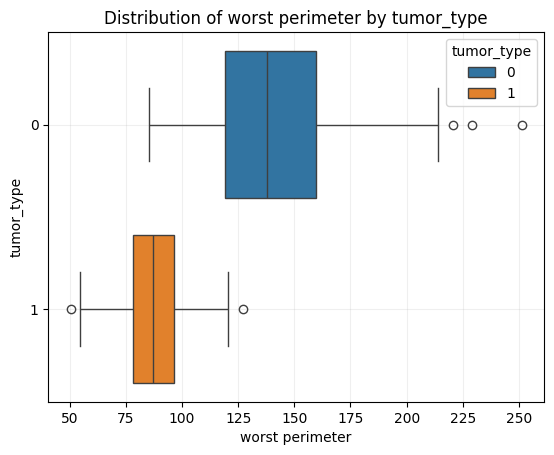

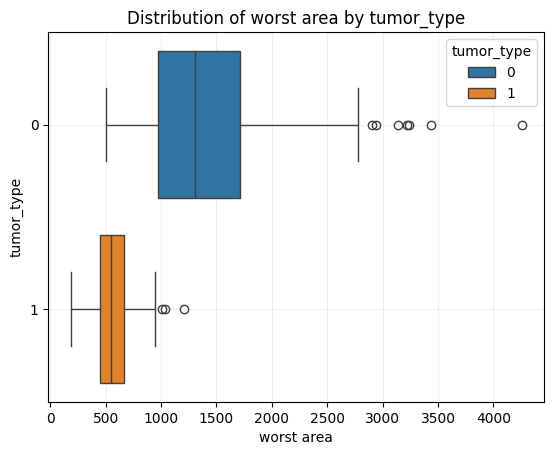

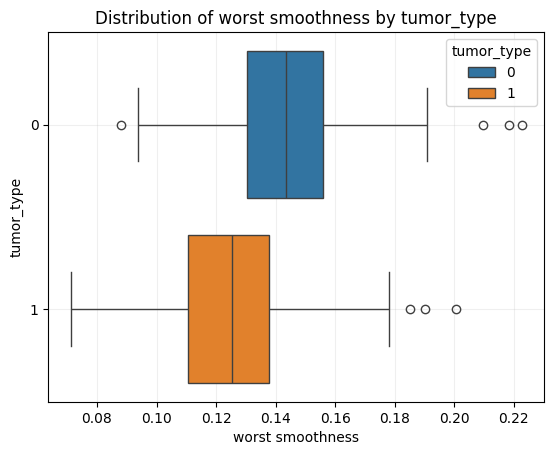

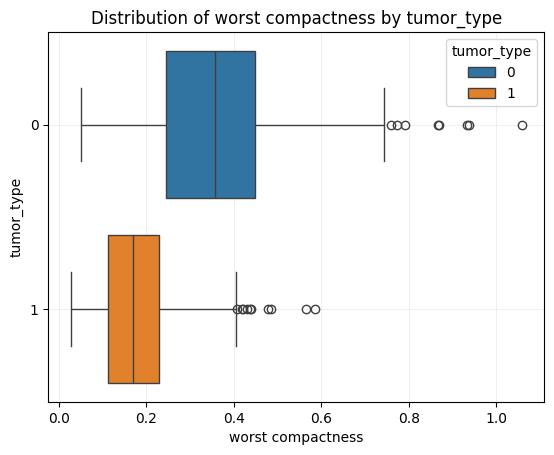

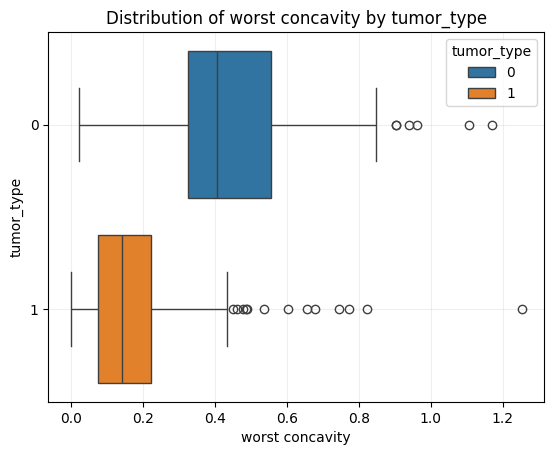

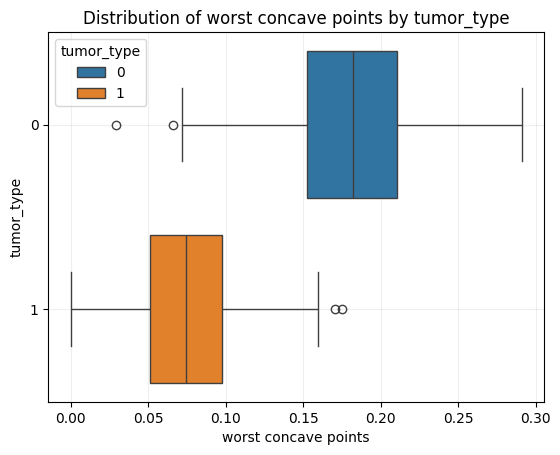

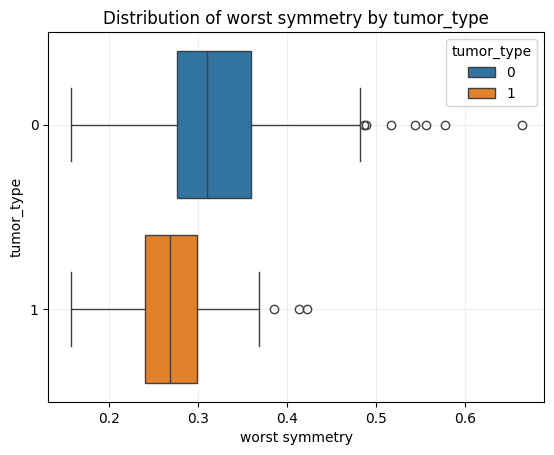

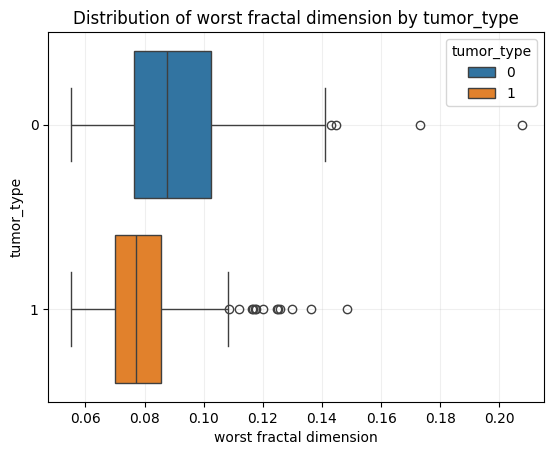

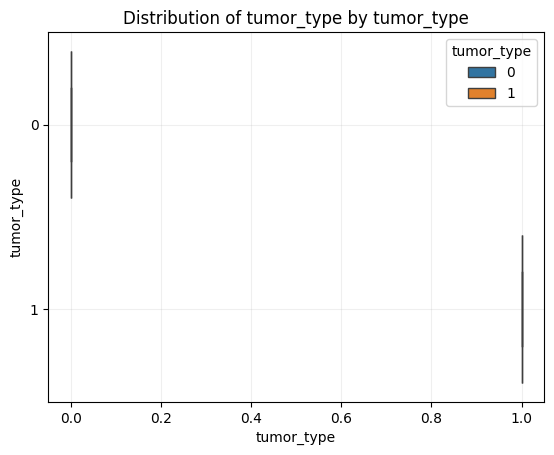

In [62]:
# defining function to plot boxplots of columns
def plot_boxplots_by_category(df, x_colname, y_colname):
    # x_colname must be numeric
    # y_colname must be the categorical value, which will automatically be converted to str
    sns.boxplot(x=df[x_colname], y=df[y_colname].apply(str), hue=df[y_colname])
    plt.title(f'Distribution of {x_colname} by {y_colname}')
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.grid(alpha=0.2)
    plt.show()

# plotting boxplots of data features
for col in df.columns:
    plot_boxplots_by_category(df, col, 'tumor_type')

In [64]:
# defining function to plot violin plots of columns
def plot_violinplots_by_category(df, x_colname, y_colname):
    # x_colname must be numeric
    # y_colname must be the categorical value, which will automatically be converted to str
    sns.violinplot(x=df[x_colname], y=df[y_colname].apply(str), hue=df[y_colname])
    plt.title(f'Distribution of {x_colname} by {y_colname}')
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.grid(alpha=0.2)
    plt.show()

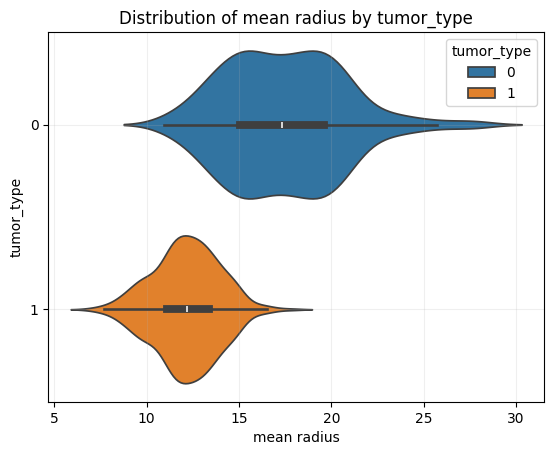

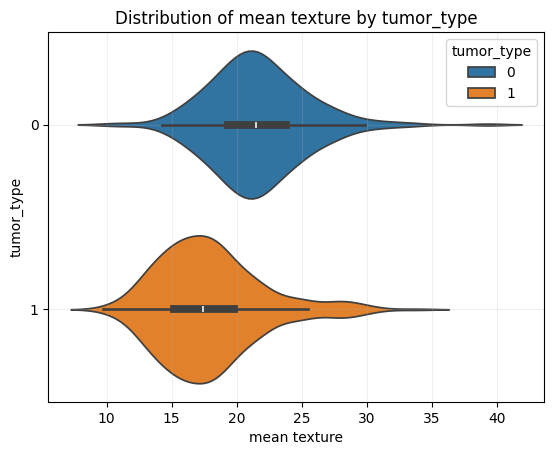

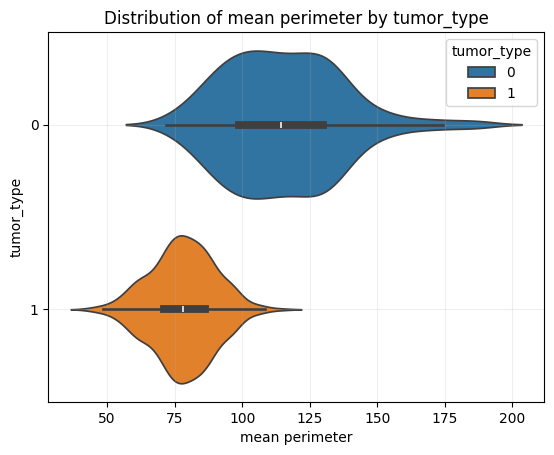

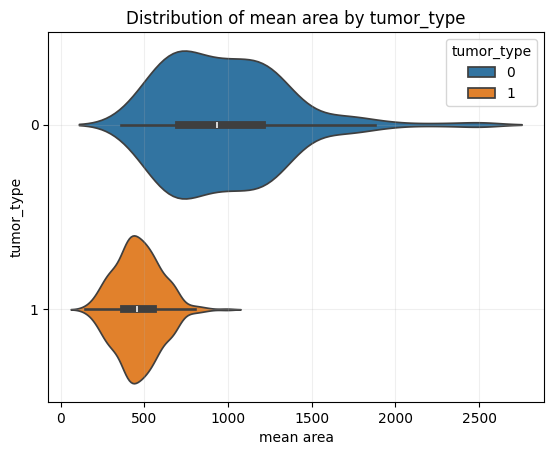

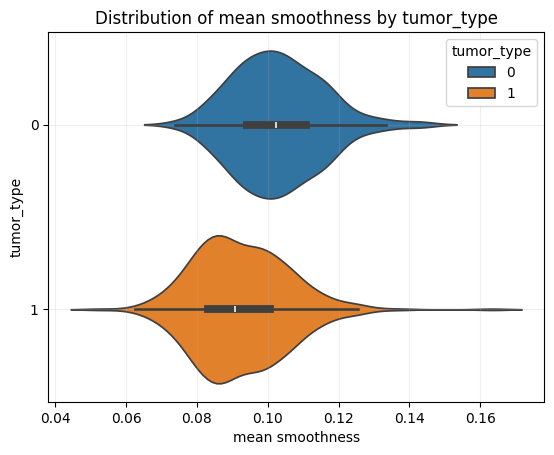

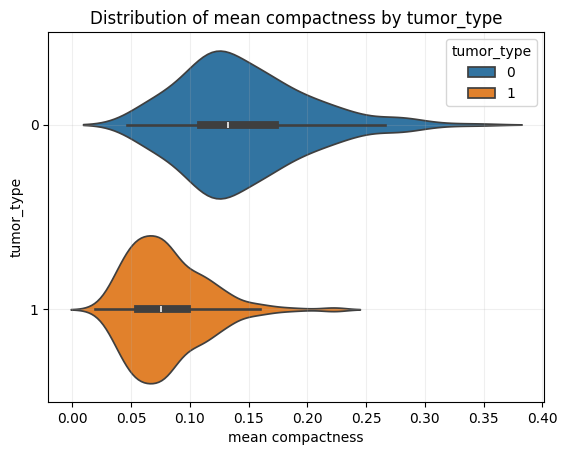

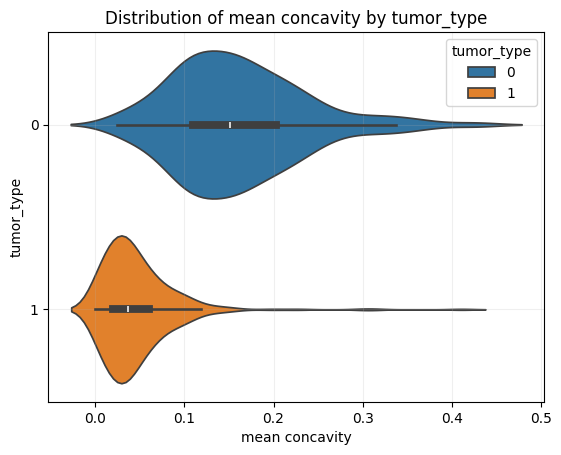

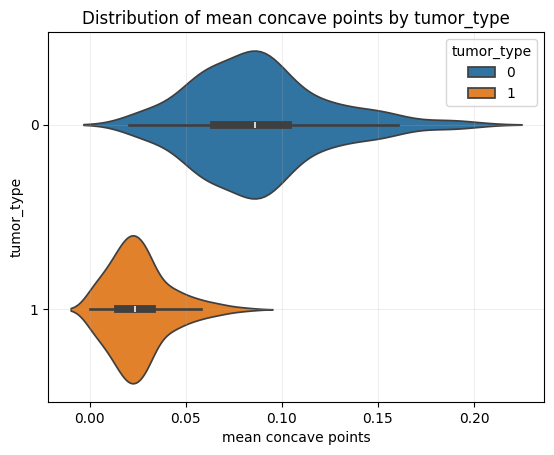

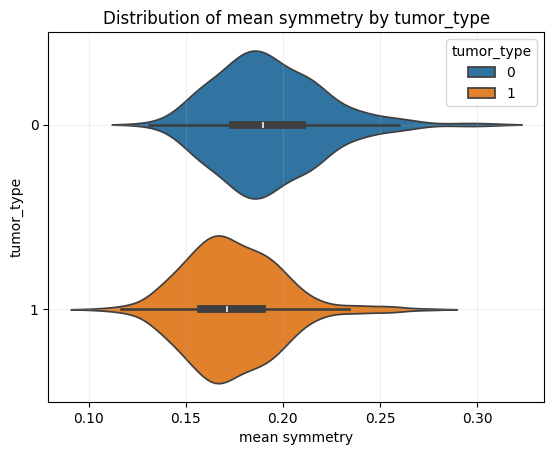

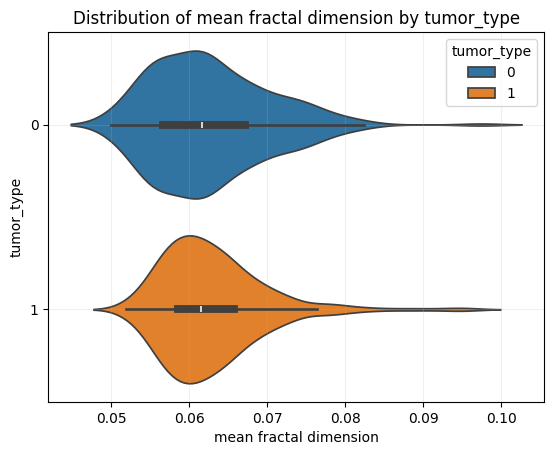

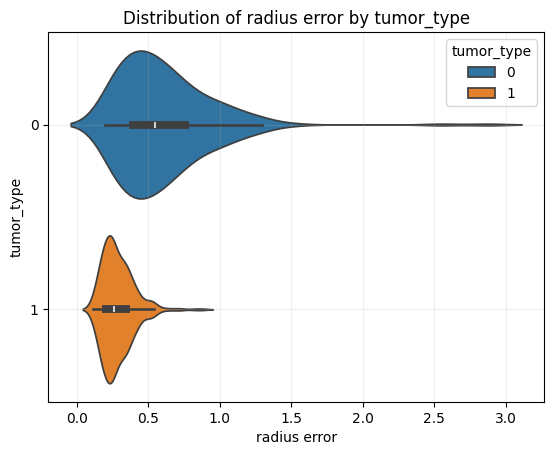

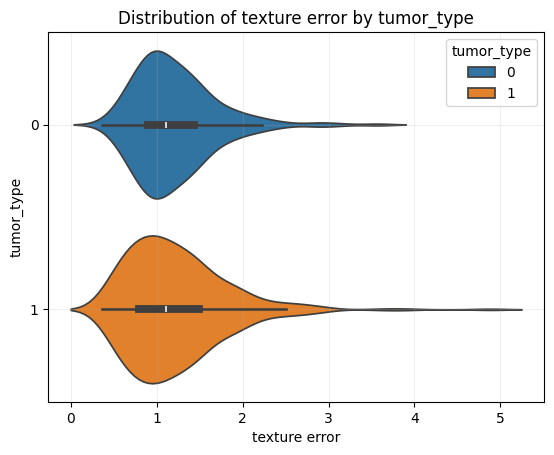

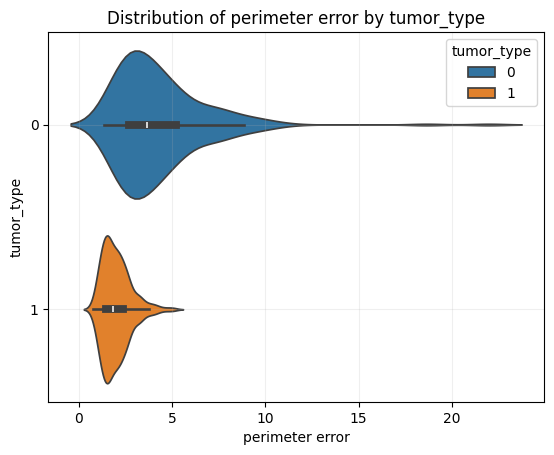

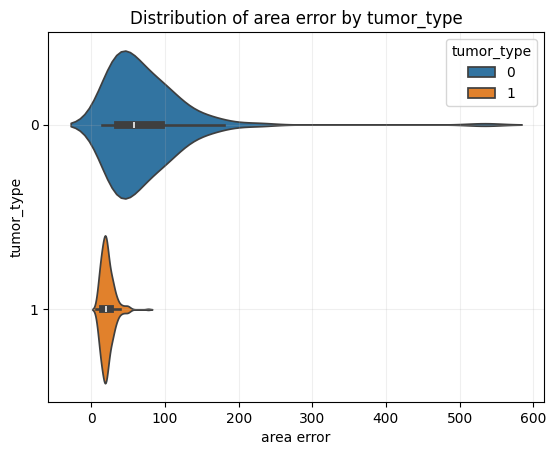

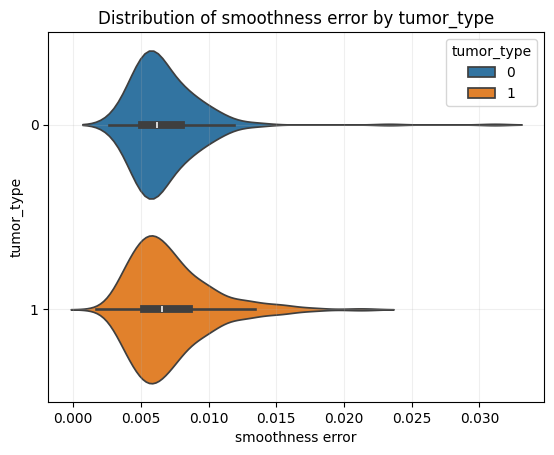

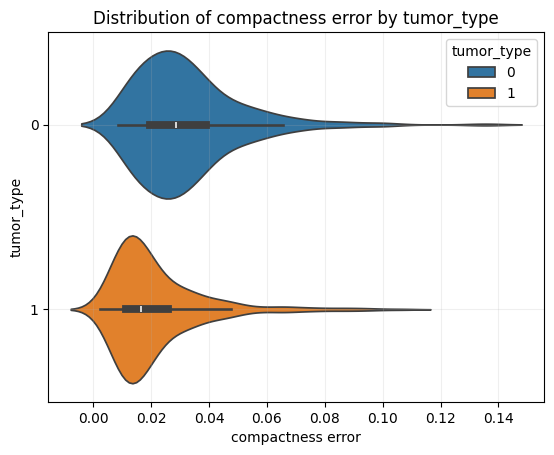

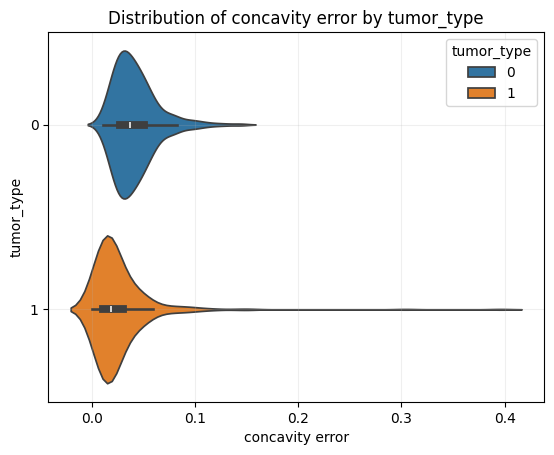

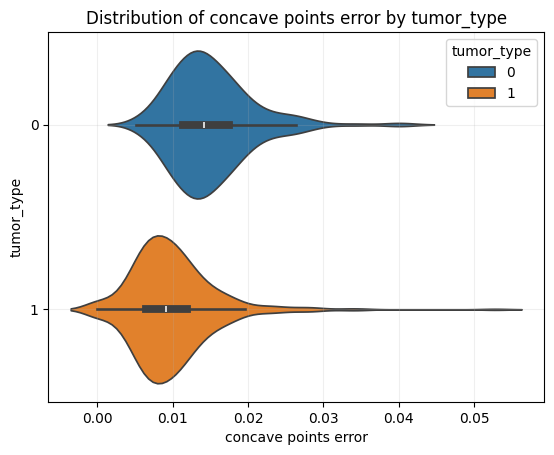

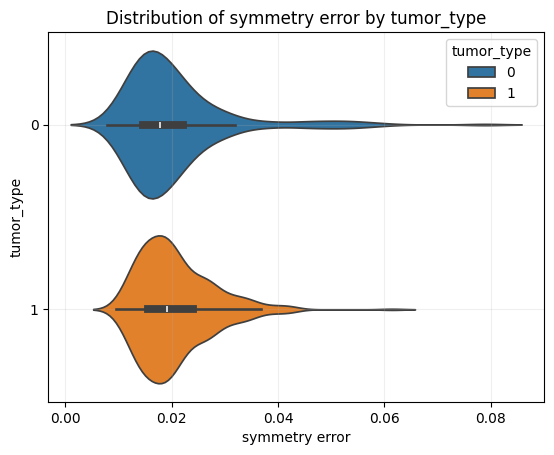

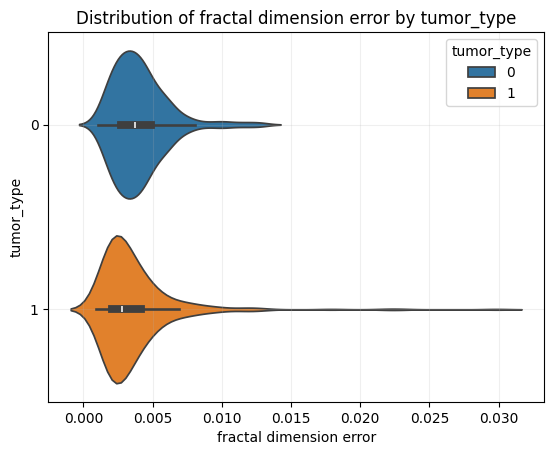

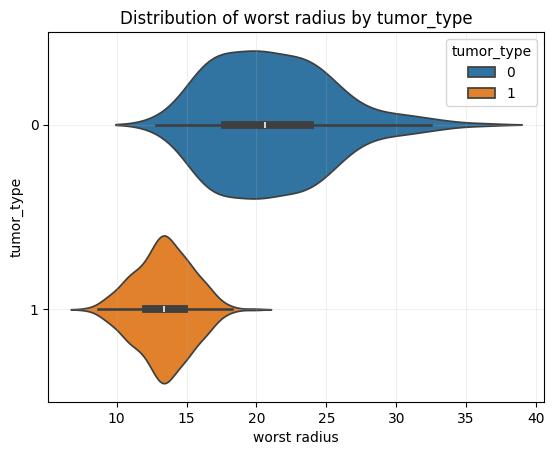

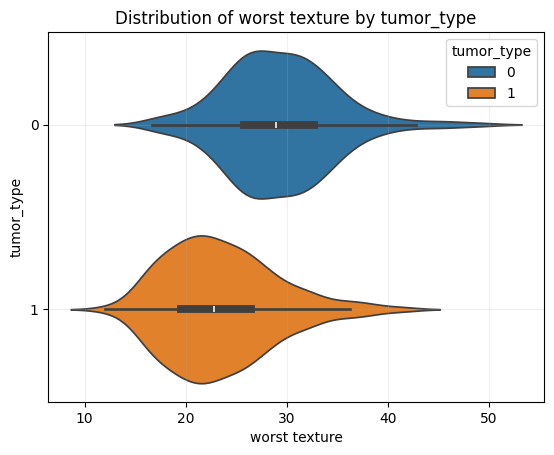

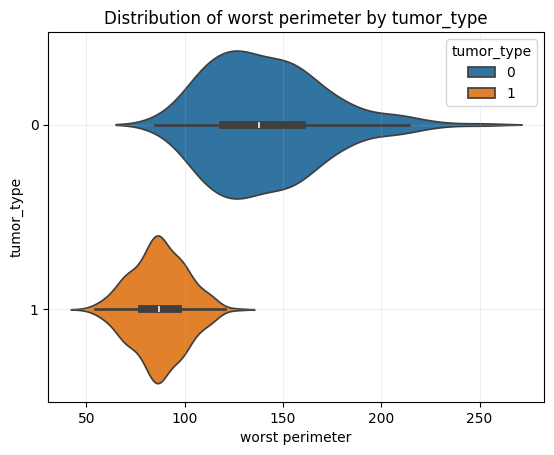

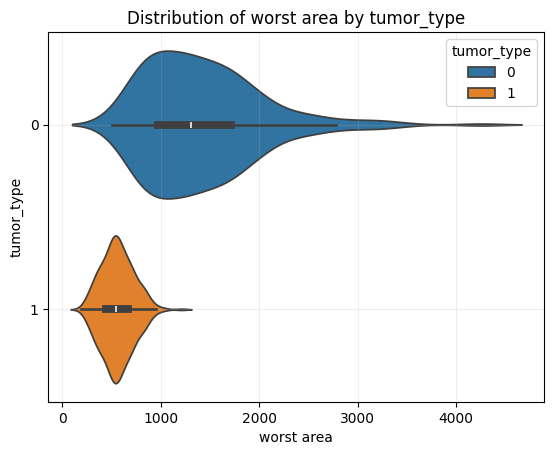

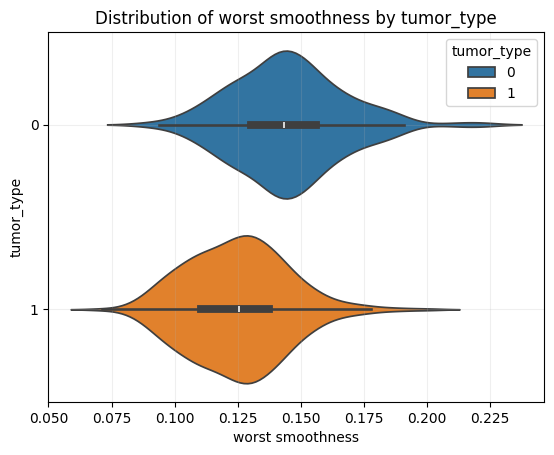

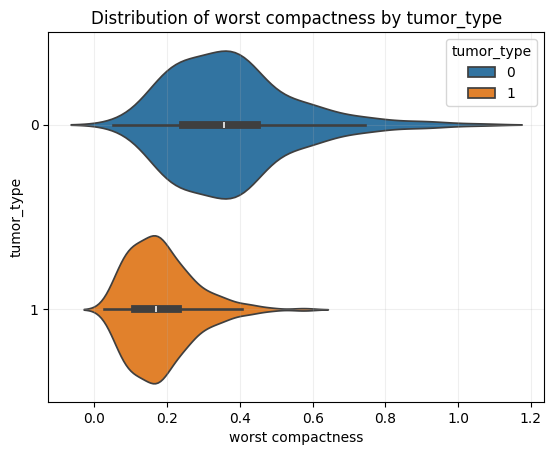

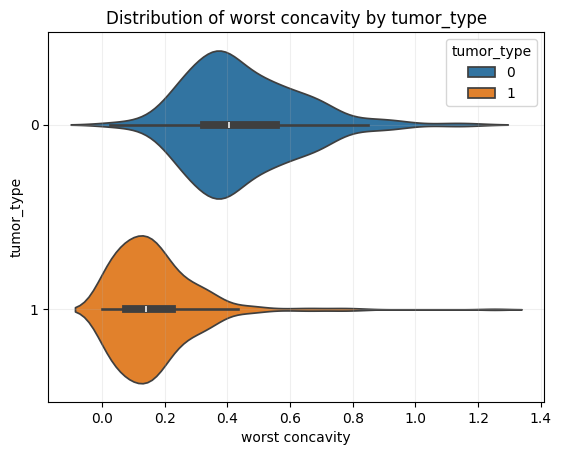

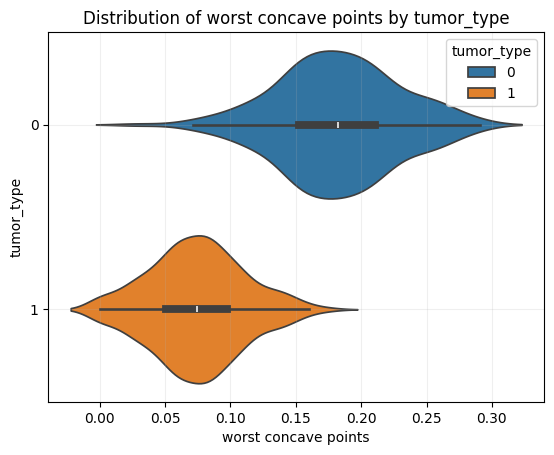

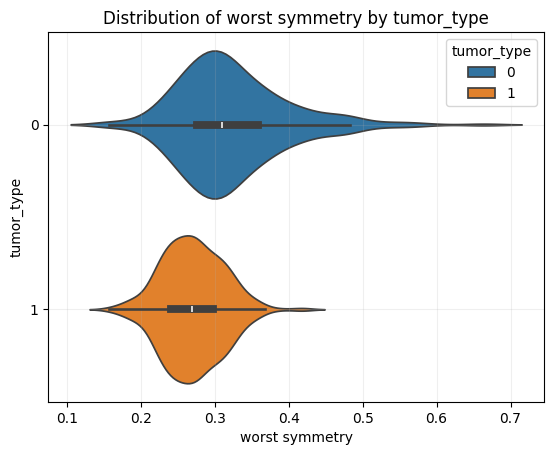

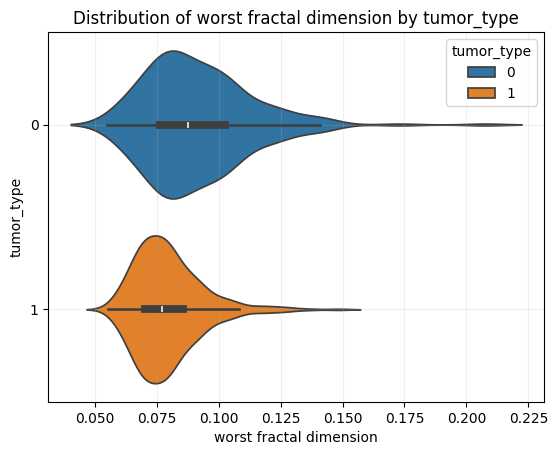

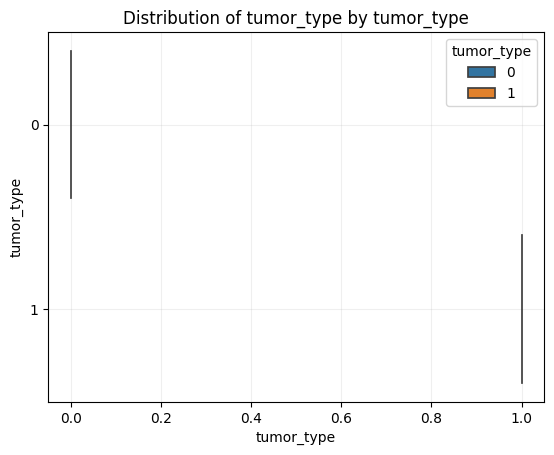

In [65]:
# plotting boxplots of data features
for col in df.columns:
    plot_violinplots_by_category(df, col, 'tumor_type')

From both the boxplots and violin plots, the data does not seem to have any outrageously crazy outliers. Therefore I don't feel the need to scale, standardize, or normalize the data. We can leave it as-is.

In [66]:
# final check of correlations through pairplot
# sns.pairplot(df)

The data looks to be in pretty good shape. Let's go ahead and start building our neural network now!

## Models

Before building the model, we need to prepare our data first into a format that TensorFlow can ingest.

In [67]:
# checking df again
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [68]:
# defining feature columns and target column
feature_columns = X.columns
target_column = y.columns

In [69]:
# splitting data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

We will construct our deep learning model using the [PyTorch](https://pytorch.org/) framework, which uses the powers of GPUs to power deep learning networks at a fast and reliable scale.

In [70]:
# converting data to Torch tensor objects
X_train = torch.tensor(np.asarray(X_train), dtype=torch.float32)
y_train = torch.tensor(np.asarray(y_train), dtype=torch.float32)
X_test = torch.tensor(np.asarray(X_test), dtype=torch.float32)
y_test = torch.tensor(np.asarray(y_test), dtype=torch.float32)

In [71]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


After testing my device (2019 MacBook Pro), it seems I have a Multi-Process Service (MPS) device, which is a feature provided by NVIDIA for their GPUs.

More device specs:
- 2.3GHz 8-core Intel Core i9 processor
- Intel UHD Graphics 630 graphics
- 16GB memory
- MacOS 13.1

Epoch [100/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [200/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [300/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [400/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [500/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [600/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [700/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [800/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [900/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [1000/1000], Loss: 36.5385, Accuracy: 0.6346
Accuracy on test set: 0.6228


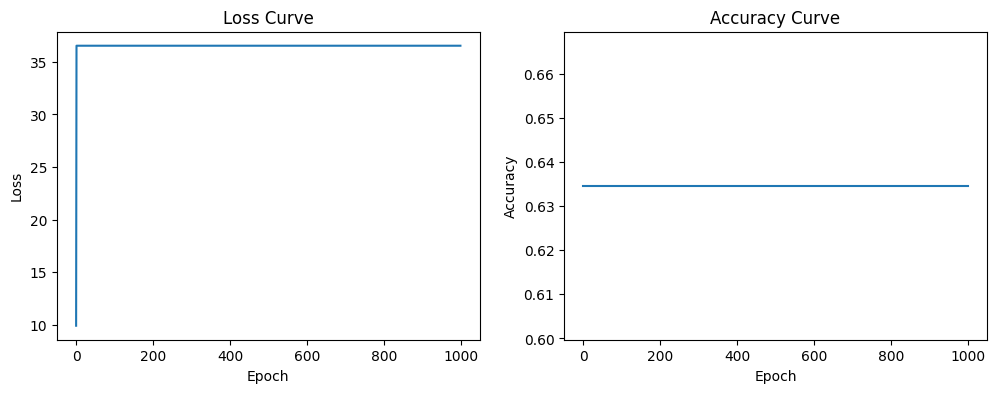

Confusion Matrix:
[[ 0 43]
 [ 0 71]]


In [72]:
class NeuralNetwork(nn.Module): # this class is a subclass of nn.Module
    def __init__(self, input_size):
        super().__init__() # ensuring that this class inherits its parent's attributes
        self.flatten = nn.Flatten() # flattening the multidimensional array into vector
        # setting up neural network
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512), # activation layer
            nn.ReLU(), # using Relu as activation function
            nn.Linear(512, 512), # hidden layer
            nn.ReLU(), # using Relu as activation function
            nn.Linear(512, 1), # output layer
            nn.Sigmoid() # using Sigmoid as activation function
        )
    # forward function to pass data through network
    def forward(self, x):
        # flattening multidimensional data to vector
        x = self.flatten(x)
        # passing data through stack of layers
        logits = self.linear_relu_stack(x) # this method is inherited from parent class
        return logits
    
def choose_optimizer(model, optimizer_choice, learning_rate):
    # function to choose optimizer
    if optimizer_choice == 'sgd': # stochastic gradient descent
        optimizer = optim.SGD(model.parameters(), learning_rate) 
    else: # adam optimizer
        optimizer = optim.Adam(model.parameters(), learning_rate)
    return optimizer

def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=1000):
    losses = []  # storing loss values for plotting
    accuracies = []  # storing accuracy values for plotting

    for epoch in range(num_epochs):
        # iterating over number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train.view(-1, 1))
        loss.backward()
        optimizer.step()

        # calculating and store accuracy
        with torch.no_grad():
            # if prob > 0.5, then class = 1, otherwise class = 0 (binary)
            predictions = (model(X_train) > 0.5).float().view(-1)
            accuracy = accuracy_score(y_train.numpy(), predictions.numpy())
            accuracies.append(accuracy)

        # storing loss value for plotting
        losses.append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

    return losses, accuracies

def test_model(model, X_test, y_test):
    # testing model on test data
    model.eval()
    with torch.no_grad():
        predictions = (model(X_test) > 0.5).float().view(-1) # if prob > 0.5, then class = 1, otherwise class = 0 (binary)
        accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
        print(f'Accuracy on test set: {accuracy:.4f}')
    return predictions, accuracy

def plot_loss_accuracy_curves(losses, accuracies):
    # plotting loss vs epoch
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # plotting accuracy vs epoch
    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

def get_confusion_matrix(y_test, predictions):
    # obtaining confusion matrix
    conf_matrix = confusion_matrix(y_test.numpy(), predictions.numpy())
    print('Confusion Matrix:')
    print(conf_matrix)
    return conf_matrix

def pipeline(X_train, y_train, X_test, y_test, optimizer_choice, learning_rate):
    # defining size of input layer
    input_size = X_train.shape[1]
    # defining model
    model = NeuralNetwork(input_size)
    # setting loss function criterion
    criterion = nn.BCELoss()
    # choosing optimizer
    optimizer = choose_optimizer(model, optimizer_choice, learning_rate)
    # fitting model with training data
    losses, accuracies = train_model(model, criterion, optimizer, X_train, y_train)
    # testing model with testing data
    predictions, accuracy = test_model(model, X_test, y_test)
    # plotting loss and accuracy curves
    plot_loss_accuracy_curves(losses, accuracies)
    # obtaining confusion matrix
    conf_matrix = get_confusion_matrix(y_test, predictions)

pipeline(X_train, y_train, X_test, y_test, 'sgd', 0.001)

Epoch [100/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [200/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [300/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [400/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [500/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [600/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [700/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [800/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [900/1000], Loss: 36.5385, Accuracy: 0.6346
Epoch [1000/1000], Loss: 36.5385, Accuracy: 0.6346
Accuracy on test set: 0.6228


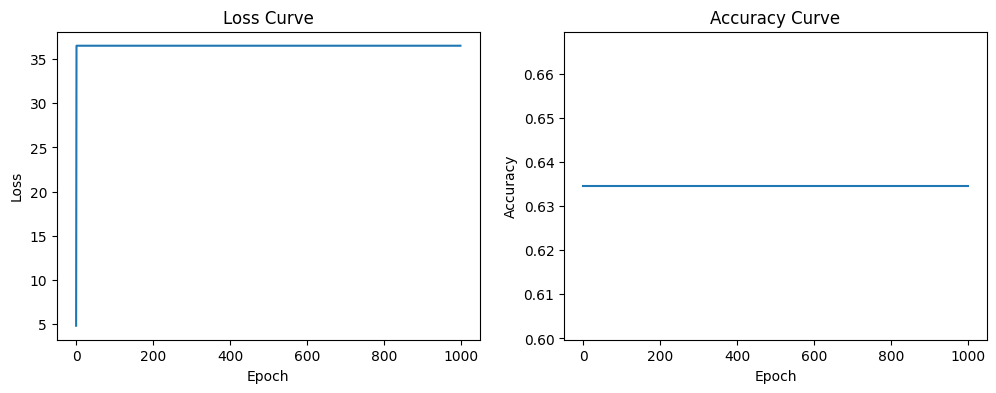

Confusion Matrix:
[[ 0 43]
 [ 0 71]]


In [73]:
pipeline(X_train, y_train, X_test, y_test, 'sgd', 0.001)

In [74]:


def hyperparameter_tuning(X_train, y_train, X_test, y_test, optimizer_choices, learning_rates, num_epochs_list):
    best_accuracy = 0
    best_hyperparameters = {}

    for optimizer_choice, learning_rate, num_epochs in product(optimizer_choices, learning_rates, num_epochs_list):
        print(f"Training with optimizer: {optimizer_choice}, learning rate: {learning_rate}, epochs: {num_epochs}")
        model = NeuralNetwork(X_train.shape[1])
        criterion = nn.BCELoss()
        optimizer = choose_optimizer(model, optimizer_choice, learning_rate)
        losses, accuracies = train_model(model, criterion, optimizer, X_train, y_train, num_epochs=num_epochs)
        predictions, accuracy = test_model(model, X_test, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = {
                'optimizer_choice': optimizer_choice,
                'learning_rate': learning_rate,
                'num_epochs': num_epochs
            }

    print(f"Best Hyperparameters: {best_hyperparameters}")
    print(f"Best Accuracy on Test Set: {best_accuracy:.4f}")

# Define hyperparameter search space
optimizer_choices = ['sgd', 'adam']
learning_rates = [0.1, 0.01, 0.001]
num_epochs_list = [500, 1000, 2000]

# Perform hyperparameter tuning
hyperparameter_tuning(X_train, y_train, X_test, y_test, optimizer_choices, learning_rates, num_epochs_list)


Training with optimizer: sgd, learning rate: 0.1, epochs: 500
Epoch [100/500], Loss: 36.5385, Accuracy: 0.6346
Epoch [200/500], Loss: 36.5385, Accuracy: 0.6346
Epoch [300/500], Loss: 36.5385, Accuracy: 0.6346
Epoch [400/500], Loss: 36.5385, Accuracy: 0.6346
Epoch [500/500], Loss: 36.5385, Accuracy: 0.6346
Accuracy on test set: 0.6228
Training with optimizer: sgd, learning rate: 0.1, epochs: 1000
Epoch [100/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [200/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [300/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [400/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [500/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [600/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [700/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [800/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [900/1000], Loss: 63.4615, Accuracy: 0.3654
Epoch [1000/1000], Loss: 63.4615, Accuracy: 0.3654
Accuracy on test set: 0.3772
Training with optimizer: sgd, learning rate: 0.1, epochs: 2000
Epoch [1